In [1]:
from math import log
import matplotlib.pyplot as plt

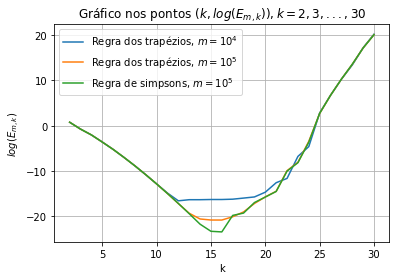

In [21]:
# EXERCÍCIO 1, TAREFA 3, ITEM 3
ks = list(range(2, 31))

trapeziosm4 = [2.11503493182779e+00, 4.65926518784316e-01, 1.29124376281809e-01, 2.69084772919949e-02, 5.33968432466758e-03, 9.09028062504869e-04, 1.43031107841418e-04, 2.02639258984338e-05, 2.65731734505614e-06, 3.53055053414764e-07, 6.40173075661110e-08, 8.18064185281742e-08, 8.17986203216492e-08, 8.54131190219931e-08, 8.54097117475305e-08, 9.16407574269584e-08, 1.16811843975384e-07, 1.49951993488884e-07, 4.27778902079012e-07, 3.45682398533720e-06, 8.87621154244123e-06, 1.13171540656598e-03, 9.82341935441555e-03, 1.61649104520109e+01, 8.06008356702353e+02, 2.75318390686568e+04, 6.31996211648756e+05, 2.83238351837420e+07, 5.53545981854637e+08]

trapeziosm5 = [2.11503492469818e+00, 4.65926464544369e-01, 1.29124439127210e-01, 2.69084511087114e-02, 5.33968375352623e-03, 9.08993954670978e-04, 1.43100759776971e-04, 2.02307850438732e-05, 2.64888284640108e-06, 3.18983395197758e-07, 3.49643232144814e-08, 4.11725054050294e-09, 1.17126508492049e-09, 9.29157750739762e-10, 9.26677068413539e-10, 1.90554283463484e-09, 5.54045820333471e-09, 3.52349232013438e-08, 1.51336258191748e-07, 5.19428687839607e-07, 4.91237719886239e-05, 3.11854119275257e-04, 3.13908388204767e-02, 1.46038575116924e+01, 7.92886577361134e+02, 2.79339942297951e+04, 7.36587510863195e+05, 2.70155667257183e+07, 5.04067924555524e+08]

simpsonm5 = [2.11503492462615e+00, 4.65926463996488e-01, 1.29124439761996e-01, 2.69084508442367e-02, 5.33968374774285e-03, 9.08993610154563e-04, 1.43101463317530e-04, 2.02304504324236e-05, 2.64879763656189e-06, 3.18669965637675e-07, 3.57451284127563e-08, 3.73634190253824e-09, 3.71193520365409e-10, 7.75705055744424e-11, 6.76469991134354e-11, 2.57319254792776e-09, 4.27741986275265e-09, 4.35734730519499e-08, 1.46938716083511e-07, 5.04027302783427e-07, 4.44097319431958e-05, 2.83294860920602e-04, 2.61204323414179e-02, 1.48496450634439e+01, 7.87244507788824e+02, 2.79479769930506e+04, 7.48088065720730e+05, 2.68074731799837e+07, 4.99992309400118e+08]

plt.plot(ks, list(map(log, trapeziosm4)), label=r'Regra dos trapézios, $m = 10^4$')
plt.plot(ks, list(map(log, trapeziosm5)), label=r'Regra dos trapézios, $m = 10^5$')
plt.plot(ks, list(map(log, simpsonm5)), label=r'Regra de simpsons, $m = 10^5$')

plt.xlabel('k')
plt.ylabel(r'$log(E_{m, k})$')

plt.title(r'Gráfico nos pontos $(k, log(E_{m, k})), k = 2, 3, ..., 30$')

plt.grid(True)

plt.legend()




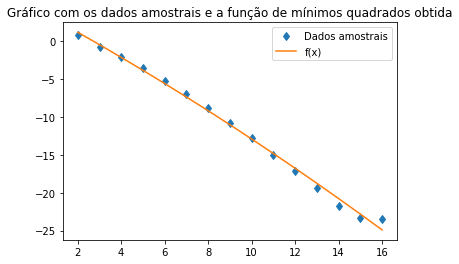

In [20]:
# EXERCICIO 1, TAREFA 4, ITEM 3

def f_i(i):
    return lambda x: x ** (i - 1)


def fi_fj(i, j):
    fi = f_i(i)
    fj = f_i(j)
    
    return sum(fi(xk) * fj(xk) for xk in range(2, 17))


yks = list(map(log, [2.11503492462615e+00, 4.65926463996488e-01, 1.29124439761996e-01, 2.69084508442367e-02, 5.33968374774285e-03, 9.08993610154563e-04, 1.43101463317530e-04, 2.02304504324236e-05,2.64879763656189e-06,3.18669965637675e-07,3.57451284127563e-08,3.73634190253824e-09,3.71193520365409e-10,7.75705055744424e-11, 6.76469991134354e-11]))


def fi_y(i):
    fi = f_i(i)

    return sum (fi(xk) * yk for xk, yk in zip(range(2, 17), yks))


matriz = [[fi_fj(i, j) for j in range(1, 4)] for i in range(1, 4)]

vetor = [fi_y(i) for i in range(1, 4)]


def resolucao_sistema_gauss(A, y):
    n = len(y)

    # 1ª parte: Escalonamento (ou eliminação)

    for j in range(n - 1):
        ell = j

        while A[ell][j] == 0:
            ell += 1

            if ell > n:
                return None  # sistema singular

        for k in range(j, n):
            A[j][k], A[ell][k] = A[ell][k], A[j][k]

        y[j], y[ell] = y[ell], y[j]

        for i in range(j + 1, n):
            m = -A[i][j] / A[j][j]

            for k in range(j, n):
                A[i][k] += m*A[j][k]

            y[i] += m * y[j]

    # 2ª parte: substituição pra trás

    x = [0] * n
    for k in range(n - 1, -1, -1):
        x[k] = y[k]

        if k < n:
            for j in range(k + 1, n):
                x[k] -= A[k][j] * x[j]

        x[k] /= A[k][k]

    return x


plt.plot(range(2, 17), yks, 'd', label='Dados amostrais')


def f(x):
    alphas = resolucao_sistema_gauss(matriz, vetor)
    f1 = f_i(1)
    f2 = f_i(2)
    f3 = f_i(3)
    
    return alphas[0] * f1(x) + alphas[1] * f2(x) + alphas[2] * f3(x)


plt.plot(list(range(2, 17)), list(map(f, range(2, 17))), label='f(x)')

plt.title('Gráfico com os dados amostrais e a função de mínimos quadrados obtida')

plt.legend()

Text(0.5, 0.92, 'Gráfico nos pontos $(p_x(t_j^*), p_y(t_j^*), p_z(t_j^*)), t_j^* = j / 50, j = 0, 1,..., 50$')

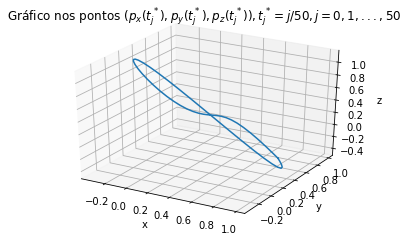

In [4]:
# EXERCÍCIO 2, ITEM 3
ax = plt.axes(projection='3d')

ti = [0.000, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875, 1.000]
xi = [0.7416, 0.2685, 0.3333, 0.3982, -0.0749, -0.3089, 0.3333, 0.9756, 0.7416]
yi = [0.7416, 0.9756, 0.3333, -0.3089, -0.0749, 0.3982, 0.3333, 0.2685, 0.7416]
zi = [-0.4832, -0.2441, 0.3334, 0.9107, 1.1498, 0.9107, 0.3334, -0.2441, -0.4832]


def pol_interpolador(t, x, y):

    n = len(x) - 1
    M = [[0.0] * (n + 1) for _ in range(n + 1)]

    for i in range(n + 1):
        M[i][0] = y[i]

    for j in range(n):
        for i in range(n - j):
            M[i][j + 1] = (M[i + 1][j] - M[i][j]) / (x[i + j + 1] - x[i])
    #### Calculando o polinômio
    resp = 0
    fator = 1
    for i in range(n + 1):
        resp += M[0][i] * fator
        fator *= (t - x[i])

    return resp


px = [pol_interpolador(j / 50, ti, xi) for j in range(51)]
py = [pol_interpolador(j / 50, ti, yi) for j in range(51)]
pz = [pol_interpolador(j / 50, ti, zi) for j in range(51)]

ax.plot(px, py, pz)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title(r'Gráfico nos pontos $(p_x(t_j^*), p_y(t_j^*), p_z(t_j^*)), t_j^* = j / 50, j = 0, 1,..., 50$')
